# SVM Modeling and hyperparameter tuning




In [1]:
import pandas as pd
import plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import timeit
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings(action='once')

In [2]:
import os
os.getcwd()

'/Users/ej7793/Documents/CreditCard/src'

In [3]:
df = pd.read_csv('../Data/feature_engineered.csv')

predictor_list = pd.read_pickle(r'../src/predictor_list')

In [4]:
df.describe()

,education_num,hours_per_week,approved,married,hours,capital_net,inquiry,institution_BRO,institution_PVT,account_type_high_approval,...,occupation_ Tech-support,occupation_ Transport-moving,asset_code_1.0,asset_code_2.0,asset_code_4.0,asset_code_19.0,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
count,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,...,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000
mean,10.120202,40.940675,0.249869,0.467669,0.777182,557.719499,0.360765,0.006911,0.580731,0.001163,...,0.031544,0.051411,0.968342,0.025933,0.004379,0.001346,0.000342,0.382296,0.025204,0.592158
std,2.555691,12.014723,0.432942,0.498959,0.416142,2601.498611,0.480228,0.082846,0.493445,0.034087,...,0.174786,0.220837,0.175091,0.158939,0.066032,0.036660,0.018494,0.485954,0.156745,0.491439
min,1.000000,1.000000,0.000000,0.000000,0.000000,-4356.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,13.000000,45.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,16.000000,99.000000,1.000000,1.000000,1.000000,15024.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.dtypes

user_id              object
education_num       float64
hours_per_week      float64
approved              int64
married               int64
                     ...   
asset_code_19.0       int64
portfolio_type_F      int64
portfolio_type_I      int64
portfolio_type_M      int64
portfolio_type_R      int64
Length: 69, dtype: object

In [6]:
df.columns

Index(['user_id', 'education_num', 'hours_per_week', 'approved', 'married',
       'hours', 'capital_net', 'inquiry', 'institution_BRO', 'institution_PVT',
       'account_type_high_approval', 'account_type_mid_approval',
       'gender_ Female', 'gender_ Male', 'age_group_mid_age',
       'age_group_minor or senior', 'age_group_older_age', 'age_group_young',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'education_level_ 10th', 'education_level_ 11th',
       'education_level_ 12th', 'education_level_ 1st-4th',
       'education_level_ 5th-6th', 'education_level_ 7th-8th',
       'education_level_ 9th', 'education_level_ Assoc-acdm',
       'education_level_ Assoc-voc', 'education_level_ Bachelors',
       'education_level_ Doctorate', 'education_level_ HS-grad',
       'education_level_ Masters', 'education_level_ Preschool'

In [7]:
df = df.sample(10000)

X_train, X_final_test = train_test_split(df,test_size=0.2, random_state= 2)
X_final_test.to_csv('../Data/testing_dataset.csv', index = False)
## within the training dataset, split the data into training dataset and testing/validation dataset
X_train, X_test = train_test_split(X_train,test_size=0.2, random_state= 2)
print('records in training dataset')
print(len(X_train))
print('records in validation dataset')
print(len(X_test))
print('records in final testing dataset')
print(len(X_final_test))

records in training dataset
6400
records in validation dataset
1600
records in final testing dataset
2000


In [8]:
predictors = predictor_list
target = 'approved'


In [9]:
def modelfit(estimator,data_train,data_test,predictors,target):
    start = timeit.default_timer()
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    start1 = timeit.default_timer()
    train_pred=estimator.predict(data_train[predictors])
    stop1 = timeit.default_timer()
    #cross_validation score
    start3 = timeit.default_timer()
#    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=5,scoring='precision')
    stop3 = timeit.default_timer()
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on Train Data: %.4g" % metrics.accuracy_score(data_train.loc[:,target].values, train_pred))
    print ("Precision on Train Data: %.4g" % metrics.precision_score(data_train.loc[:,target].values, train_pred))
    print ("Recall on Train Data: %.4g" % metrics.recall_score(data_train.loc[:,target].values, train_pred))
    print ("F1 score on Train Data: %.4g" % metrics.f1_score(data_train.loc[:,target].values, train_pred))
    
#    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    start2 = timeit.default_timer()
    test_pred=estimator.predict(data_test[predictors])
    stop2 = timeit.default_timer()
    print ("Accuracy on Test Data: %.4g" % metrics.accuracy_score(data_test.loc[:,target].values, test_pred))  
    print ("Precision on Test Data: %.4g" % metrics.precision_score(data_test.loc[:,target].values, test_pred)) 
    print ("Recall on Test Data: %.4g" % metrics.recall_score(data_test.loc[:,target].values, test_pred)) 
    print ("F1 score on Test Data: %.4g" % metrics.f1_score(data_test.loc[:,target].values, test_pred)) 
    stop = timeit.default_timer()
    print('Total Time: ', stop - start)
    print('training time: ', stop1 - start1)
    print('testing time: ', stop2 - start2)
#    print('CV time:', stop3 - start3)
    return test_pred



In [10]:
X_test.approved.value_counts(normalize =True)

0    0.735625
1    0.264375
Name: approved, dtype: float64

In [11]:
## create learning curve ploting function

from sklearn.model_selection import learning_curve
##learning curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
def plot_learning_curve(alg, X, y, scoring_metric, algorithm_name):
    sizes, training_scores, testing_scores = learning_curve(alg, X, y, cv = 5, scoring= scoring_metric, train_sizes=np.linspace(0.01, 1.0, 30))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)

    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)

    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    # Drawing plot
    plt.title("LEARNING CURVE FOR %s" % algorithm_name)
    plt.xlabel("Training Set Size"), plt.ylabel("%s Score" % scoring_metric), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return

In [12]:
# create validation curve ploting function


 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
def plot_validation_curve(alg,X, y, param_name, parameter_range, scoring_metric, algorithm_name):
    start = timeit.default_timer()
    train_score, test_score = validation_curve(alg, X, y,
                                           param_name = param_name,
                                           param_range = parameter_range,
                                         scoring = scoring_metric)

    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with %s" % algorithm_name)
    plt.xlabel("%s" % param_name)
    plt.ylabel("%s" % scoring_metric)
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    return

## Modeling

**SVM**

In [13]:
from sklearn.svm import SVC
svm = SVC(random_state =1)
y_pred=modelfit(svm, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8048
Precision on Train Data: 0.8316
Recall on Train Data: 0.2937
F1 score on Train Data: 0.4341
Accuracy on Test Data: 0.7925
Precision on Test Data: 0.8054
Recall on Test Data: 0.2837
F1 score on Test Data: 0.4196
Total Time:  4.708416079000003
training time:  2.890160398000006
testing time:  0.7816504240000057


In [14]:
from collections import Counter
Counter(y_pred)

Counter({0: 1468, 1: 132})

**Learning curve**

Based on the learning curve, we can see that the training curve and the cross validation curve converges at 2000 samples

In [15]:
X_train_test = X_train.sample(5000)
X = X_train_test[predictors]
y = X_train_test[target]

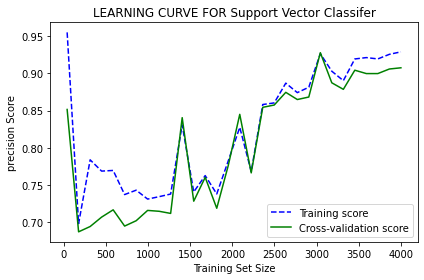

In [16]:
plot_learning_curve(svm, X, y, 'precision', 'Support Vector Classifer')

**Validation curve**

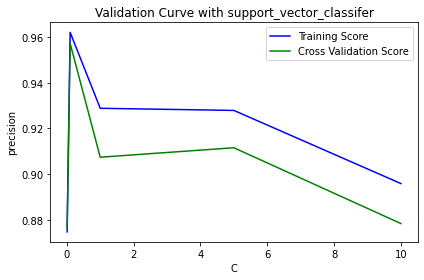

Time:  51.140216244000015


In [17]:
## validation curve
##C


parameter_range = [0.01, 0.1, 1, 5, 10]
 
plot_validation_curve(svm,X, y, "C", parameter_range, "precision", 'support_vector_classifer')

In [18]:
X_train_test = X_train.sample(1000)
X = X_train_test[predictors]
y = X_train_test[target]

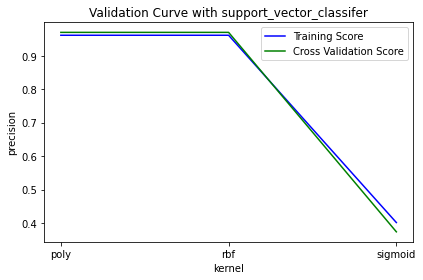

Time:  0.9967429139999808


In [19]:
##Validation curve 
# Kernel
## no over fitting underfitting issues
## choose highest 
from sklearn.model_selection import validation_curve

parameter_range = ['poly', 'rbf', 'sigmoid']
plot_validation_curve(svm,X, y, "kernel", parameter_range, "precision", 'support_vector_classifer')



/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


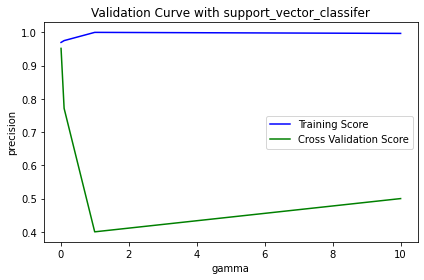

Time:  3.1663492870000027


In [20]:
##Gamma
parameter_range = [0.01,0.1, 1, 10]
plot_validation_curve(svm,X, y, "gamma", parameter_range, "precision", 'support_vector_classifer')

In [21]:
svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

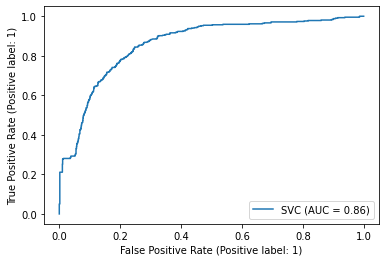

In [22]:
## ROC curve
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

plot_roc_curve(svm, X_test[predictors], X_test[target])

In [16]:
## hyperparameter tuning 
##GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {'gamma': [0.01,0.1],
              'kernel': ['rbf'],
              'C':[0.1,1]
             }
grid_lr = GridSearchCV(estimator =svm, param_grid= param_grid, scoring='precision', 
                        refit=True, return_train_score=True) 
grid_lr.fit(X_train_test[predictors],X_train_test[target])


GridSearchCV(estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 1], 'gamma': [0.01, 0.1],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='precision')

In [17]:
print(grid_lr.best_estimator_)

print(grid_lr.best_params_)

SVC(C=0.1, gamma=0.01, random_state=1)
{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [18]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**New model after hyperparameter tuning**

In [20]:
svm_tuned = SVC(gamma=0.01,kernel = 'rbf',C = 0.1, random_state = 1)
y_pred=modelfit(svm_tuned, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8167
Precision on Train Data: 0.9712
Recall on Train Data: 0.2894
F1 score on Train Data: 0.4459
Accuracy on Test Data: 0.8
Precision on Test Data: 0.9187
Recall on Test Data: 0.2671
F1 score on Test Data: 0.4139
Total Time:  4.761320393999995
training time:  2.924010350000003
testing time:  0.7209046979999982


In [21]:
## compare with before hyper parameter tuning 
y_pred=modelfit(svm, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8048
Precision on Train Data: 0.8316
Recall on Train Data: 0.2937
F1 score on Train Data: 0.4341
Accuracy on Test Data: 0.7925
Precision on Test Data: 0.8054
Recall on Test Data: 0.2837
F1 score on Test Data: 0.4196
Total Time:  4.32346367599996
training time:  2.6947421340000233
testing time:  0.6600846009999941


**ROC curve after hyper parameter tuning**

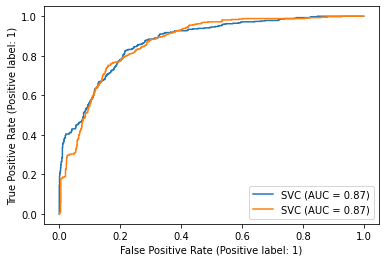

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

disp = plot_roc_curve(svm_tuned, X_test[predictors], X_test[target])
plot_roc_curve(svm,X_test[predictors], X_test[target], ax= disp.ax_);

**Learning curve after hyper parameter tuning**

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 560, in _validate_targets
    " class" % len(cls))
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

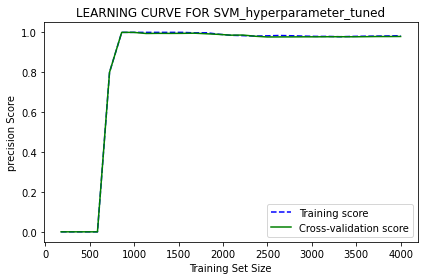

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 560, in _validate_targets
    " class" % len(cls))
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)


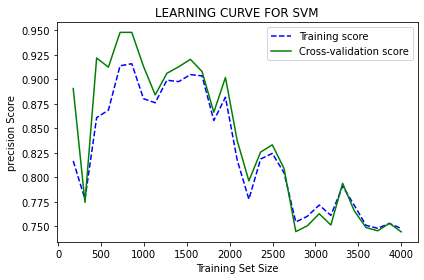

In [26]:
disp = plot_learning_curve(svm_tuned, X, y, 'precision', 'SVM_hyperparameter_tuned')
plot_learning_curve(svm, X, y, 'precision', 'SVM');

## Final prediction results and performance

In [27]:
y_pred=modelfit(svm_tuned, X_train, X_final_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8167
Precision on Train Data: 0.9712
Recall on Train Data: 0.2894
F1 score on Train Data: 0.4459
Accuracy on Test Data: 0.825
Precision on Test Data: 0.9787
Recall on Test Data: 0.2845
F1 score on Test Data: 0.4409
Total Time:  5.517776647000005
training time:  3.3320841130000645
testing time:  1.0546614690000524
